In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M


In [5]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
22604,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
22605,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
22606,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
22607,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L
22608,2021,MI,FT,Threat Intelligence Analyst,66310,USD,66310,US,0,US,L


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


In [7]:
data.shape

(22609, 11)

In [8]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
data.nunique()

,0
work_year,5
experience_level,4
employment_type,4
job_title,254
salary,3342
salary_currency,22
salary_in_usd,3727
employee_residence,79
remote_ratio,3
company_location,77


In [10]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,22609.000000,2.260900e+04,22609.00000,22609.000000
mean,2023.656376,2.009111e+05,147521.95002,23.543722
std,0.735059,5.198490e+06,63453.23768,41.969535
min,2020.000000,1.506100e+04,15061.00000,0.000000
25%,2024.000000,1.000000e+05,100000.00000,0.000000
50%,2024.000000,1.380000e+05,138000.00000,0.000000
75%,2024.000000,1.850000e+05,184000.00000,0.000000
max,2024.000000,6.000000e+08,720000.00000,100.000000


In [11]:
#Cleaning Data

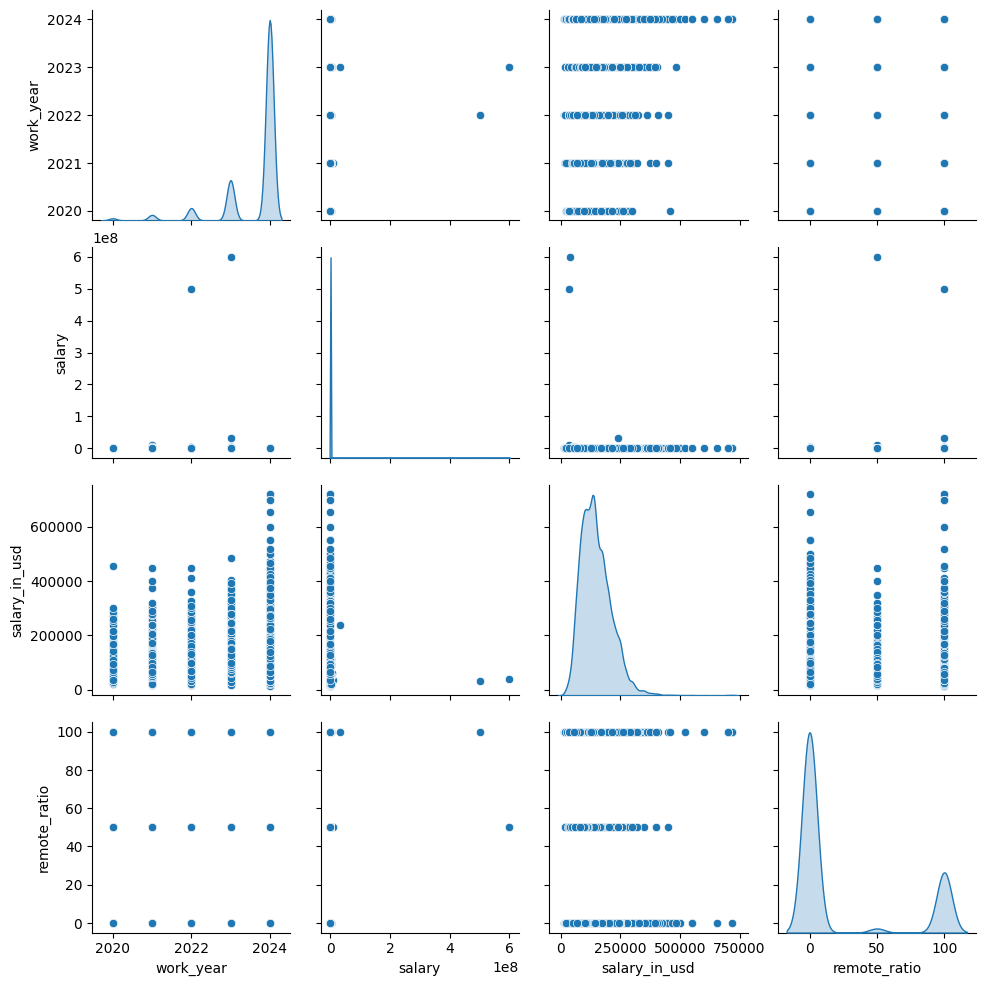

In [12]:
sns.pairplot(data, diag_kind='kde')

<Axes: xlabel='work_year', ylabel='salary'>

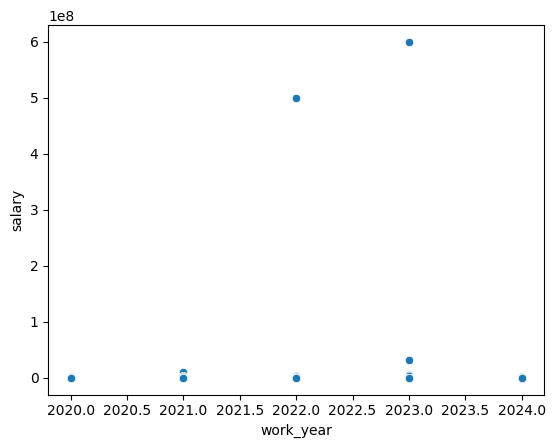

In [13]:
sns.scatterplot(x='work_year', y='salary', data=data)

<Axes: ylabel='experience_level'>

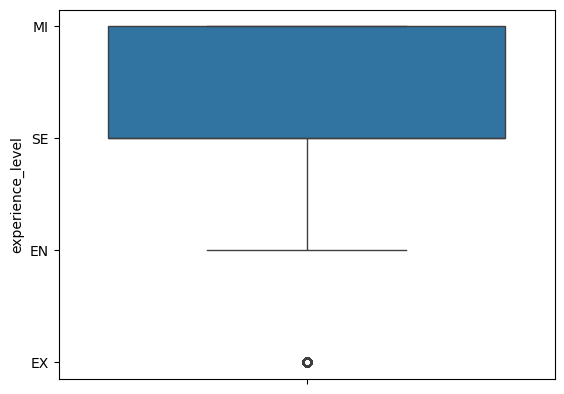

In [14]:
sns.boxplot(data['experience_level'])

<Axes: ylabel='salary'>

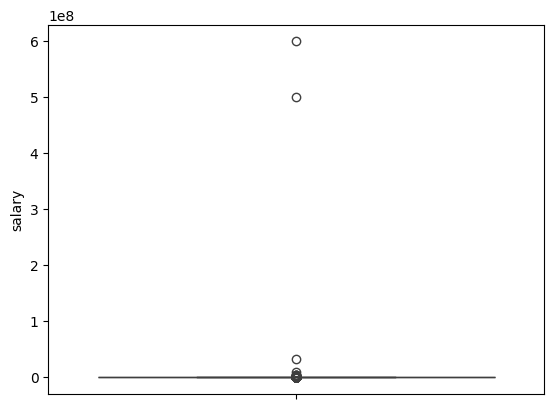

In [15]:
sns.boxplot(data['salary'] )

<Axes: xlabel='salary', ylabel='Density'>

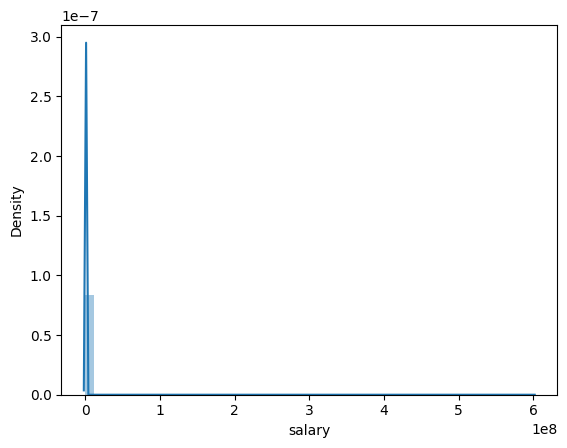

In [16]:
sns.distplot(data['salary'])

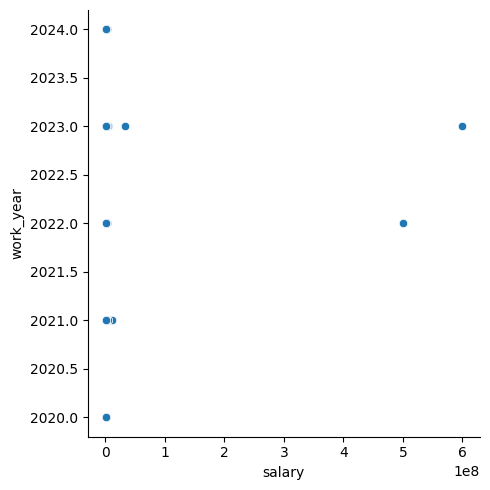

In [17]:
sns.relplot(x='salary', y='work_year',  data=data)

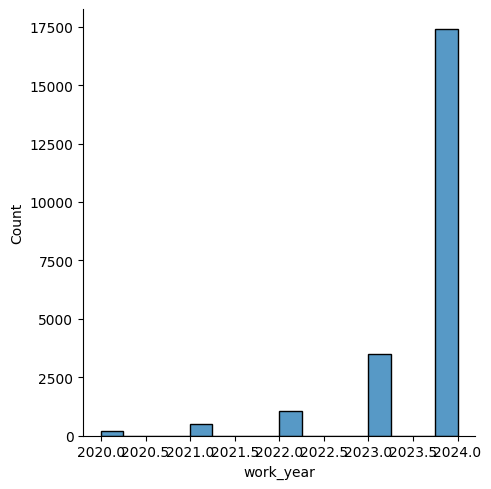

In [18]:
sns.displot(data['work_year'])

In [19]:
data.drop_duplicates(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13276 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13276 non-null  int64 
 1   experience_level    13276 non-null  object
 2   employment_type     13276 non-null  object
 3   job_title           13276 non-null  object
 4   salary              13276 non-null  int64 
 5   salary_currency     13276 non-null  object
 6   salary_in_usd       13276 non-null  int64 
 7   employee_residence  13276 non-null  object
 8   remote_ratio        13276 non-null  int64 
 9   company_location    13276 non-null  object
 10  company_size        13276 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [20]:
data.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [21]:
data.shape

(13276, 11)

<Axes: ylabel='salary'>

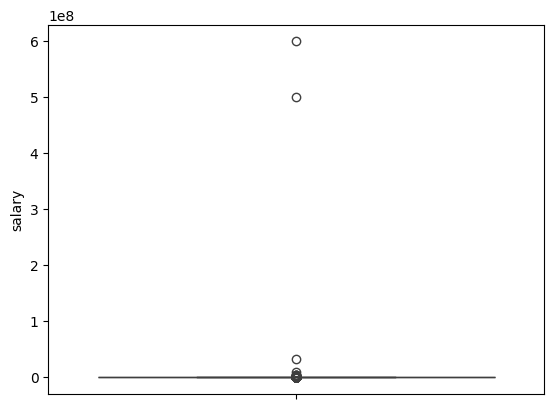

In [22]:
sns.boxplot(data['salary'])

In [26]:
data['salary'].max()

600000000

In [34]:
# Filter rows where experience_level is 'SE' and Salary is over 400000000
senior_employees = data[data['experience_level'] == 'SE']
se_salaries = data[data['salary'] > 400000000]

# Display the relevant columns (e.g., job title and salary)
print(senior_employees[[ 'job_title']], " " ,  se_salaries)

                           job_title
12                   Program Manager
13                   Program Manager
14                   Program Manager
15                   Program Manager
16                 Software Engineer
...                              ...
22595         Cyber Security Analyst
22598   Information Security Officer
22601  Application Security Engineer
22605   Information Security Manager
22606   Penetration Testing Engineer

[7161 rows x 1 columns]          work_year experience_level employment_type  \
17647       2023               SE              FT   
21999       2022               SE              FT   

                          job_title     salary salary_currency  salary_in_usd  \
17647  Head of Information Security  600000000             IDR          39823   
21999        Incident Response Lead  500000000             IDR          33661   

      employee_residence  remote_ratio company_location company_size  
17647                 ID            50               I

In [35]:
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
outliers = data[(data['salary'] < lower_bound) | (data['salary'] > upper_bound)]
non_outliers = data[(data['salary'] >= lower_bound) & (data['salary'] <= upper_bound)]

print("Outliers:")
print(outliers[['job_title', 'salary']])

Outliers:
                          job_title   salary
120                Security Manager   441600
207    Information Security Officer   370000
317               Security Engineer   354000
343                         Manager   313000
351                         Manager   348668
...                             ...      ...
22521      Cyber Security Architect   450000
22524     Cyber Security Researcher  1500000
22574  Penetration Testing Engineer   384000
22576  Information Security Officer   400000
22603                Ethical Hacker   356000

[276 rows x 2 columns]


In [38]:
df = data[(data['salary'] >= lower_bound) & (data['salary'] <= upper_bound)]


In [39]:
df['salary'] = df['salary'].clip(lower=lower_bound, upper=upper_bound)


In [40]:
df['salary'] = df['salary'].clip(lower=lower_bound, upper=upper_bound)


In [41]:
df['salary'] = df['salary'].clip(lower=lower_bound, upper=upper_bound)


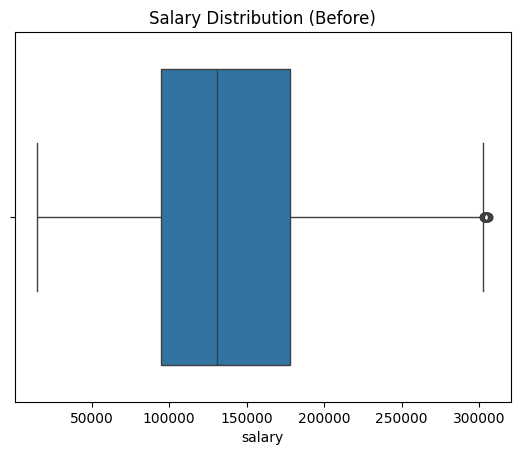

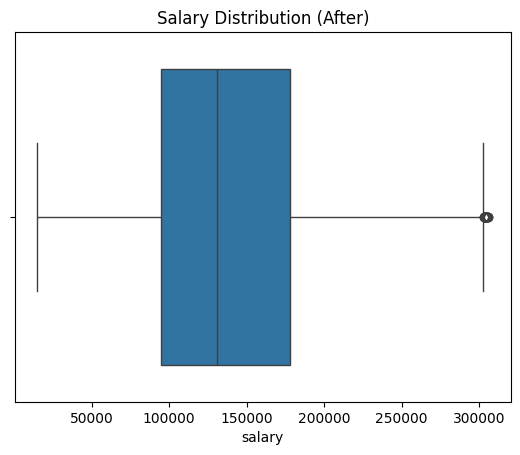

In [42]:
# Before
sns.boxplot(x=df['salary'])
plt.title("Salary Distribution (Before)")
plt.show()

# After
sns.boxplot(x=df['salary'])
plt.title("Salary Distribution (After)")
plt.show()

<Axes: xlabel='experience_level', ylabel='salary'>

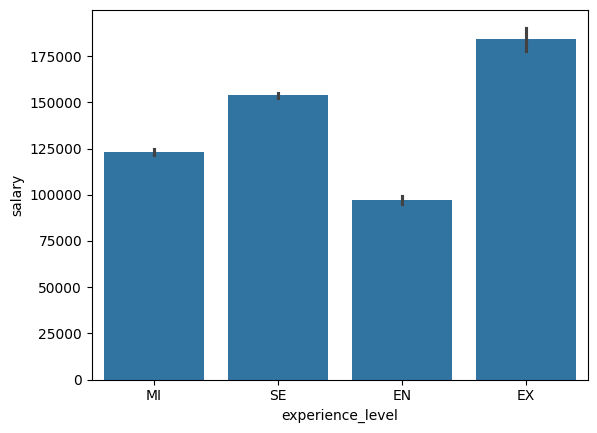

In [49]:
sns.barplot(x='experience_level', y='salary', data=df)

<Axes: xlabel='salary', ylabel='Density'>

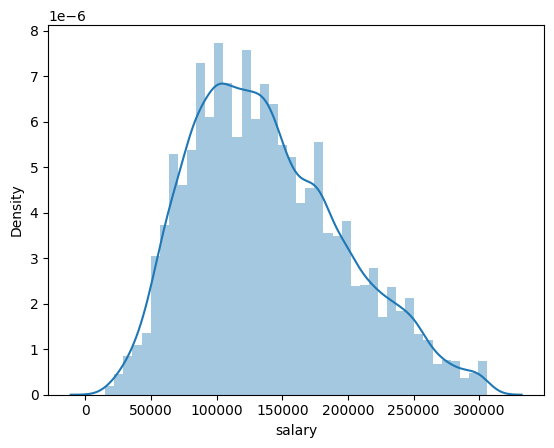

In [53]:
sns.distplot(df['salary'])

<Axes: >

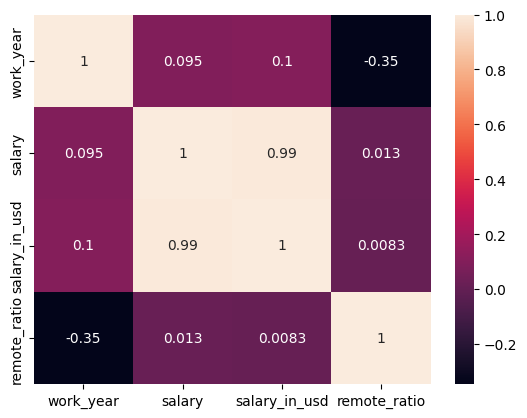

In [54]:
numeric_df = df.select_dtypes(include="number")

# Plotting the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

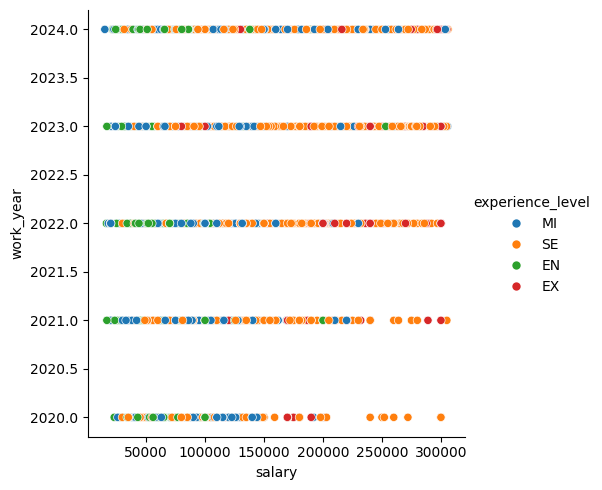

In [55]:
sns.relplot(x='salary', y='work_year', hue = 'experience_level',  data=df)